### (1) 유튜브 수익 발생 구조 분석

- 중요한 수익 지표인 RPM(Revenue per 1000 Views), CPM과 다른 지표들 사이의 상관관계 파악
- 상대적으로 더 큰 영향을 주는 지표가 무엇인지 확인 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] =False

import seaborn as sns

In [4]:
youtube_df = pd.read_csv('./data/youtube_channel_real_performance_analytics.csv')
youtube_df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [5]:
# (1) 데이터 전처리

In [6]:
# 데이터 속성 확인
youtube_df.info()
# 총 364개 값
# null값 없음
# 2가지 값(Video Publish Time, Day of Week) -> object type
# RPM(Revenue per 1000 Views), CPM

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [7]:
# Revenue per 1000 Views (USD) 이름 변경
youtube_df.rename(columns = {'Revenue per 1000 Views (USD)': 'RPM'}, inplace=True)
youtube_df.head()

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,RPM,Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [8]:
# object 객체 확인
object_cols = youtube_df.select_dtypes(include=['object']).columns
object_cols

Index(['Video Publish Time', 'Day of Week'], dtype='object')

In [9]:
# object 객체 확인
youtube_df['Video Publish Time']
youtube_df['Day of Week']

0      2016-06-02 00:00:00
1      2016-06-10 00:00:00
2      2016-06-14 00:00:00
3      2016-06-29 00:00:00
4      2016-07-01 00:00:00
              ...         
359    2024-08-25 00:00:00
360    2024-09-01 00:00:00
361    2024-09-16 00:00:00
362    2024-09-25 00:00:00
363    2024-10-18 00:00:00
Name: Video Publish Time, Length: 364, dtype: object

0       Thursday
1         Friday
2        Tuesday
3      Wednesday
4         Friday
         ...    
359       Sunday
360       Sunday
361       Monday
362    Wednesday
363       Friday
Name: Day of Week, Length: 364, dtype: object

In [10]:
# object 데이터 삭제
youtube_df.drop(columns = object_cols, inplace=True)
youtube_df.head()

,ID,Video Duration,Days Since Publish,Day,Month,Year,RPM,Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,0,2,6,2016,0.024,723.0,1.386,1.021,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,8,10,6,2016,0.056,727.0,1.612,1.361,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,4,14,6,2016,0.014,76.0,2.105,1.818,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,15,29,6,2016,0.004,18.0,1.667,0.857,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2,1,7,2016,0.000,0.0,0.000,0.000,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [11]:
# (2) 상관관계 파악

In [12]:
# 상관관계 매트릭스 출력 
youtube_df_corr_mat = youtube_df.corr()
youtube_df_corr_mat.head()

,ID,Video Duration,Days Since Publish,Day,Month,Year,RPM,Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
ID,1.000000,0.214709,0.310896,0.048912,-0.050793,0.913222,0.425593,0.158476,0.213020,0.256408,...,0.076779,0.076779,0.154699,0.464430,0.092995,0.176273,0.139118,0.269610,0.227320,0.292690
Video Duration,0.214709,1.000000,0.064094,0.036907,-0.060594,0.281516,0.436649,0.035262,0.312587,0.147707,...,-0.027306,-0.027306,-0.480500,0.881891,-0.051500,0.111037,-0.025584,0.135767,0.039546,-0.190195
Days Since Publish,0.310896,0.064094,1.000000,-0.016941,0.053944,0.299925,0.143899,0.090446,0.068389,0.079593,...,0.082708,0.082708,0.103981,0.150120,-0.013555,0.044417,0.034808,0.176890,0.060949,0.062201
Day,0.048912,0.036907,-0.016941,1.000000,-0.045382,0.022999,-0.001882,0.023871,-0.037484,-0.030300,...,-0.001443,-0.001443,-0.045128,0.012094,0.002632,0.011184,-0.028562,0.038594,0.058008,-0.101375
Month,-0.050793,-0.060594,0.053944,-0.045382,1.000000,-0.181124,0.043571,0.158665,-0.056551,-0.050009,...,0.098462,0.098462,0.067254,-0.042084,0.141222,0.124671,0.128512,0.121536,0.084873,0.118743


In [13]:
# RPM, CPM과 높은 상관관계를 가지는 측정 항목 확인
youtube_df_corr_mat.loc['RPM'].drop('RPM').sort_values(ascending=False).head(10)
youtube_df_corr_mat.loc['CPM (USD)'].drop('CPM (USD)').sort_values(ascending=False).head(10)

#1 둘 다 Playback-Based CPM (USD)이 가장 큰 영향을 끼친다.
#** Playback-Based CPM (USD): Cost per thousand monetized playbacks in USD

#2 CPM은 사실상 Playback-Based CPM (USD)외에 중요한 항목은 없다(수치 낮음)

#3 공통된 항목이지만, RPM에서는 시청시간이(Average View Duration, Video Duration),
#  CPM에서는 기타 수입 및 좋아요 비율(YouTube Premium (USD), Like Rate (%), Estimated AdSense Revenue (USD), Estimated Revenue (USD))이 더 중요하다.

#4 RPM은 광고 시청 수입이(YouTube Ads Revenue (USD), Watch Page Ads Revenue (USD)) 중요한 반면,
#  CPM은 유튜브 프리미엄수입이(YouTube Premium (USD)) 더 중요하다.(유튜브 프리미엄 구독자가 많을수록 비용 증가)
#** YouTube Premium (USD): Revenue from YouTube Premium subscribers in USD

Playback-Based CPM (USD)           0.610663
Year                               0.549695
Average View Duration              0.496288
Video Duration                     0.436649
ID                                 0.425593
CPM (USD)                          0.415668
Estimated AdSense Revenue (USD)    0.390382
YouTube Ads Revenue (USD)          0.377446
Watch Page Ads Revenue (USD)       0.377308
Estimated Revenue (USD)            0.376919
Name: RPM, dtype: float64

Playback-Based CPM (USD)           0.870086
RPM                                0.415668
Year                               0.309089
ID                                 0.256408
YouTube Premium (USD)              0.218722
Like Rate (%)                      0.216905
Estimated AdSense Revenue (USD)    0.184030
Estimated Revenue (USD)            0.171432
Average View Duration              0.168004
YouTube Ads Revenue (USD)          0.167330
Name: CPM (USD), dtype: float64

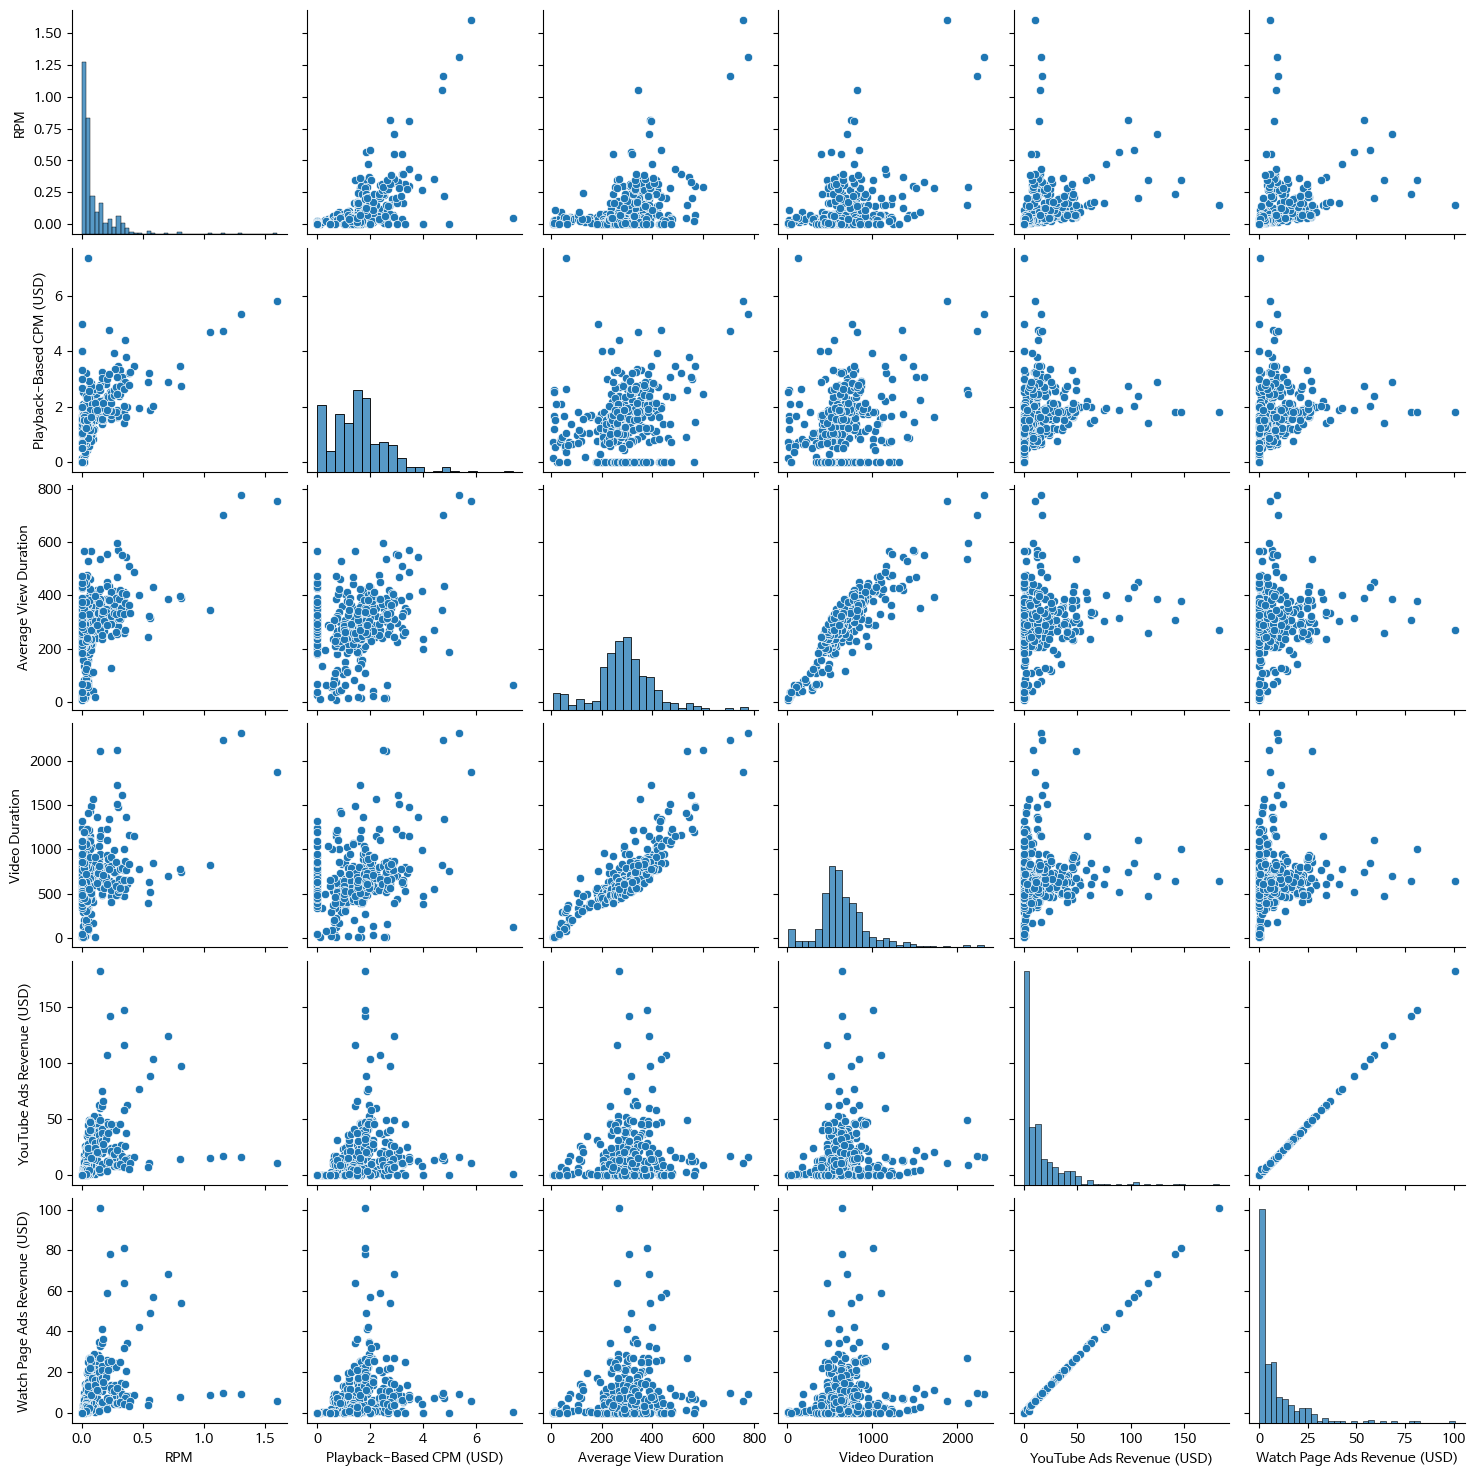

In [14]:
# pairplot으로 양의 상관관계 확인 - RPM
cols1 = ['RPM', 'Playback-Based CPM (USD)', 'Average View Duration', 'Video Duration',
       'YouTube Ads Revenue (USD)', 'Watch Page Ads Revenue (USD)']
sns.pairplot(youtube_df[cols1])
plt.show()

<Axes: xlabel='Playback-Based CPM (USD)', ylabel='RPM'>

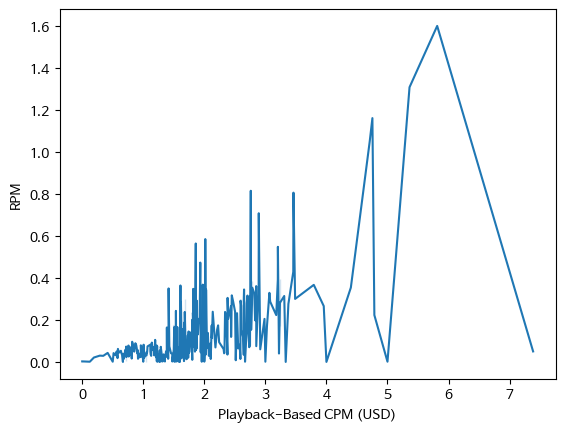

In [15]:
sns.lineplot(data=youtube_df, x='Playback-Based CPM (USD)', y='RPM')
plt.show()

<Axes: xlabel='YouTube Ads Revenue (USD)', ylabel='RPM'>

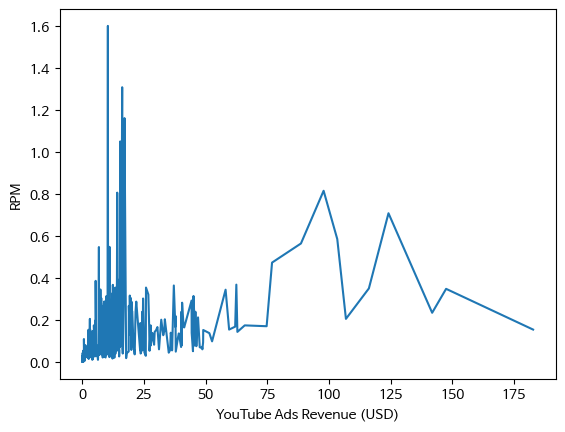

In [16]:
sns.lineplot(data=youtube_df, x='YouTube Ads Revenue (USD)', y='RPM')
plt.show()

<Axes: xlabel='Watch Page Ads Revenue (USD)', ylabel='RPM'>

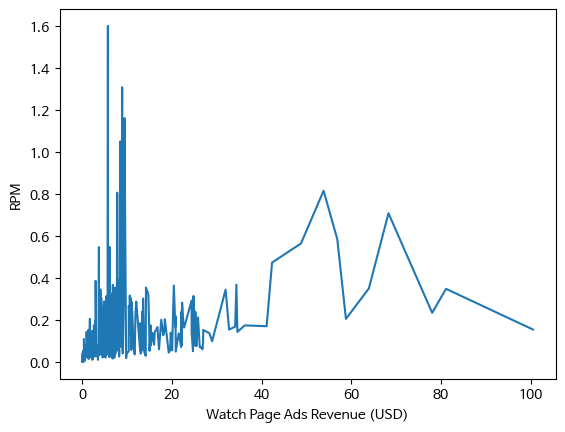

In [17]:
sns.lineplot(data=youtube_df, x='Watch Page Ads Revenue (USD)', y='RPM')
plt.show()

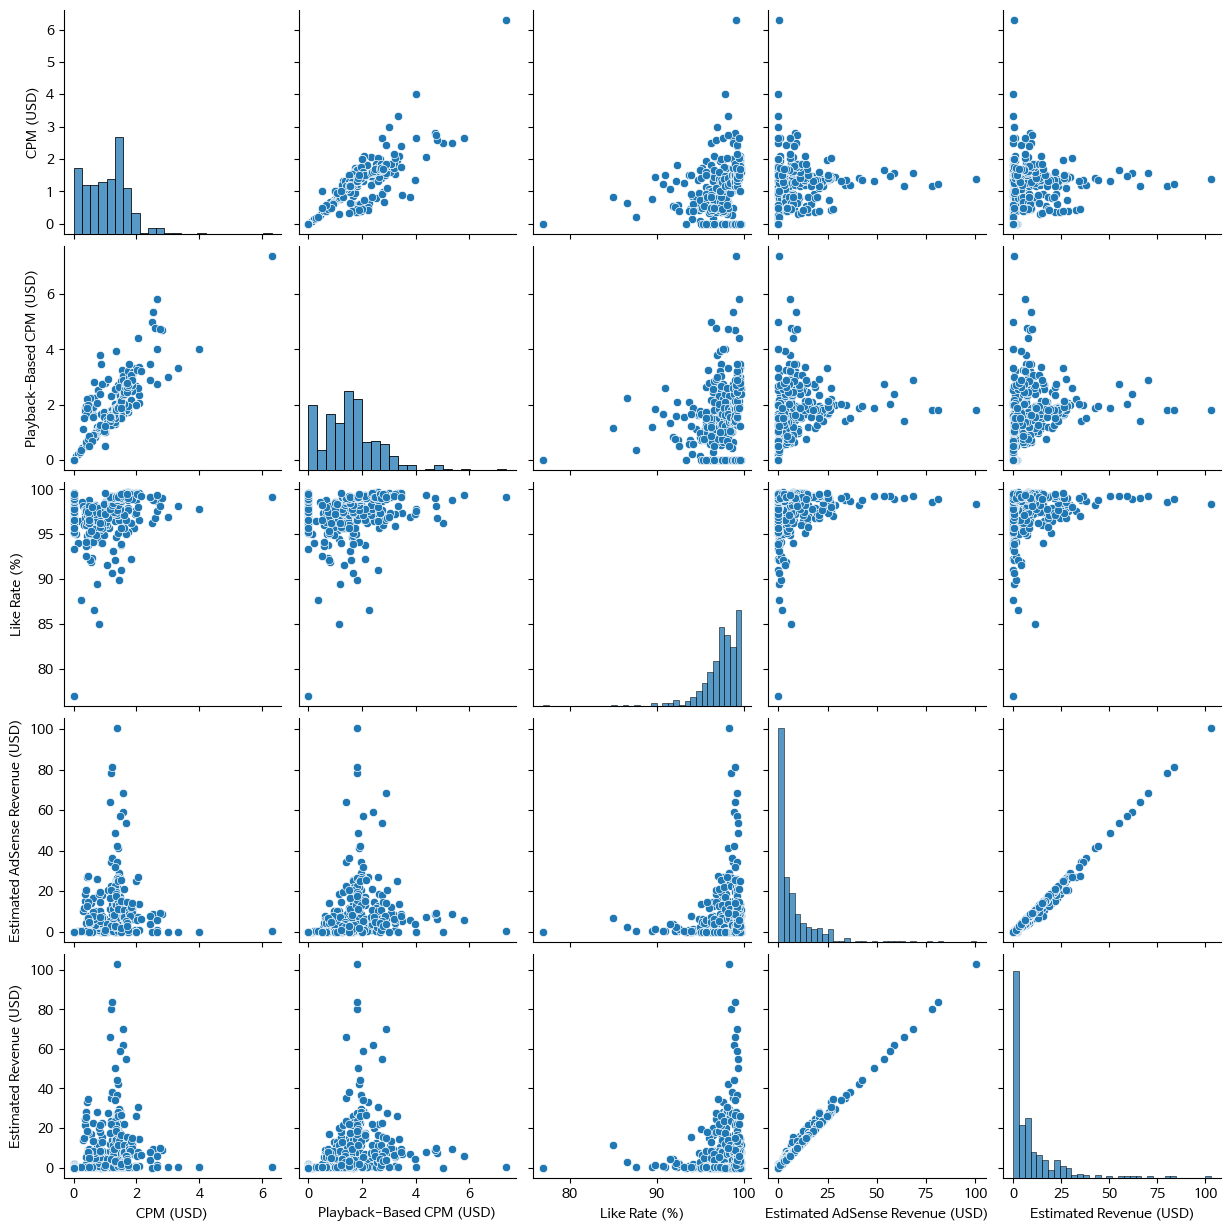

In [18]:
# pairplot으로 양의 상관관계 확인 - CPM
cols2 = ['CPM (USD)', 'Playback-Based CPM (USD)', 'Like Rate (%)',
       'Estimated AdSense Revenue (USD)','Estimated Revenue (USD)']
sns.pairplot(youtube_df[cols2])
plt.show()

<Axes: xlabel='Playback-Based CPM (USD)', ylabel='CPM (USD)'>

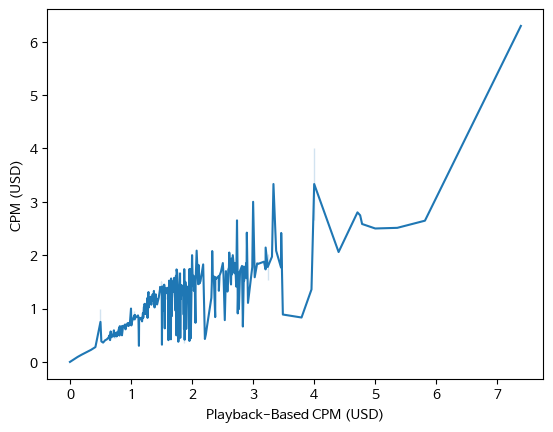

In [19]:
sns.lineplot(data=youtube_df, x='Playback-Based CPM (USD)', y='CPM (USD)')
plt.show()

<Axes: xlabel='Like Rate (%)', ylabel='CPM (USD)'>

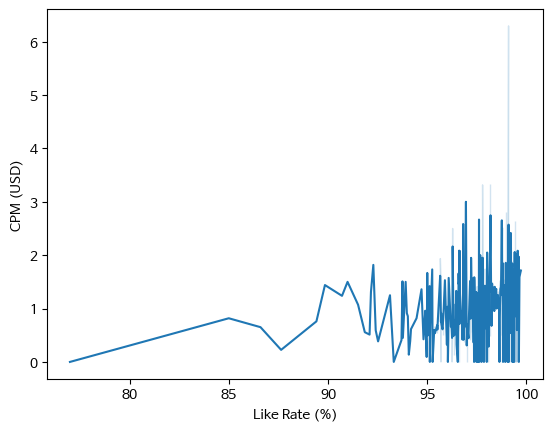

In [20]:
sns.lineplot(data=youtube_df, x='Like Rate (%)', y='CPM (USD)')
plt.show()

In [21]:
# RPM, CPM과 낮은 상관관계를 가지는 측정 항목 확인
youtube_df_corr_mat.loc['RPM'].drop('RPM').sort_values(ascending=True).head(10)
youtube_df_corr_mat.loc['CPM (USD)'].drop('CPM (USD)').sort_values(ascending=True).head(10)

#1 둘 다 싫어요(Dislikes)와 New Comments가 수익성을 낮추는 데 큰 영향을 끼친다.
#** Number of new comments received on the video

#2 RPM은 시청 관련 지표(Views, Likes, Watch Time)가 높을 수록 떨어진다.
# RPM에는 상품 판매, 협찬 및 스폰서십, 기타 수익 등이 포함되지 않고,
# 동영상에 수익 창출 설정, 미드롤 광고 설정 등 여러 수익원을 다각화 하여 RPM을 높여야 하기 때문에
# 조회수가 높다고 수익이 상승하는 것은 아니며 RPM 수치 자체는 떨어질 수 있다.

#3 CPM의 경우 모두 -0.2 이하로 수치가 낮아서 음의 상관관계는 없다고 볼 수 있지만,
#  Views per Playlist Start와 DoubleClick Revenue (USD)가 상대적으로 부정적인 영향을 끼친다.
#** Average views generated per playlist start
#** Revenue generated through DoubleClick ads in USD

Dislikes                   -0.296892
New Comments               -0.270798
Views                      -0.264912
Likes                      -0.215518
Watch Time (hours)         -0.197088
Shares                     -0.166903
Views per Playlist Start   -0.152171
Impressions                -0.145740
New Subscribers            -0.125164
Unsubscribes               -0.120611
Name: RPM, dtype: float64

Dislikes                    -0.157524
New Comments                -0.141191
Views per Playlist Start    -0.136309
DoubleClick Revenue (USD)   -0.130762
Unsubscribes                -0.096193
Video Thumbnail CTR (%)     -0.090167
Likes                       -0.084932
Views                       -0.079158
Shares                      -0.073900
Teaser Clicks               -0.062491
Name: CPM (USD), dtype: float64

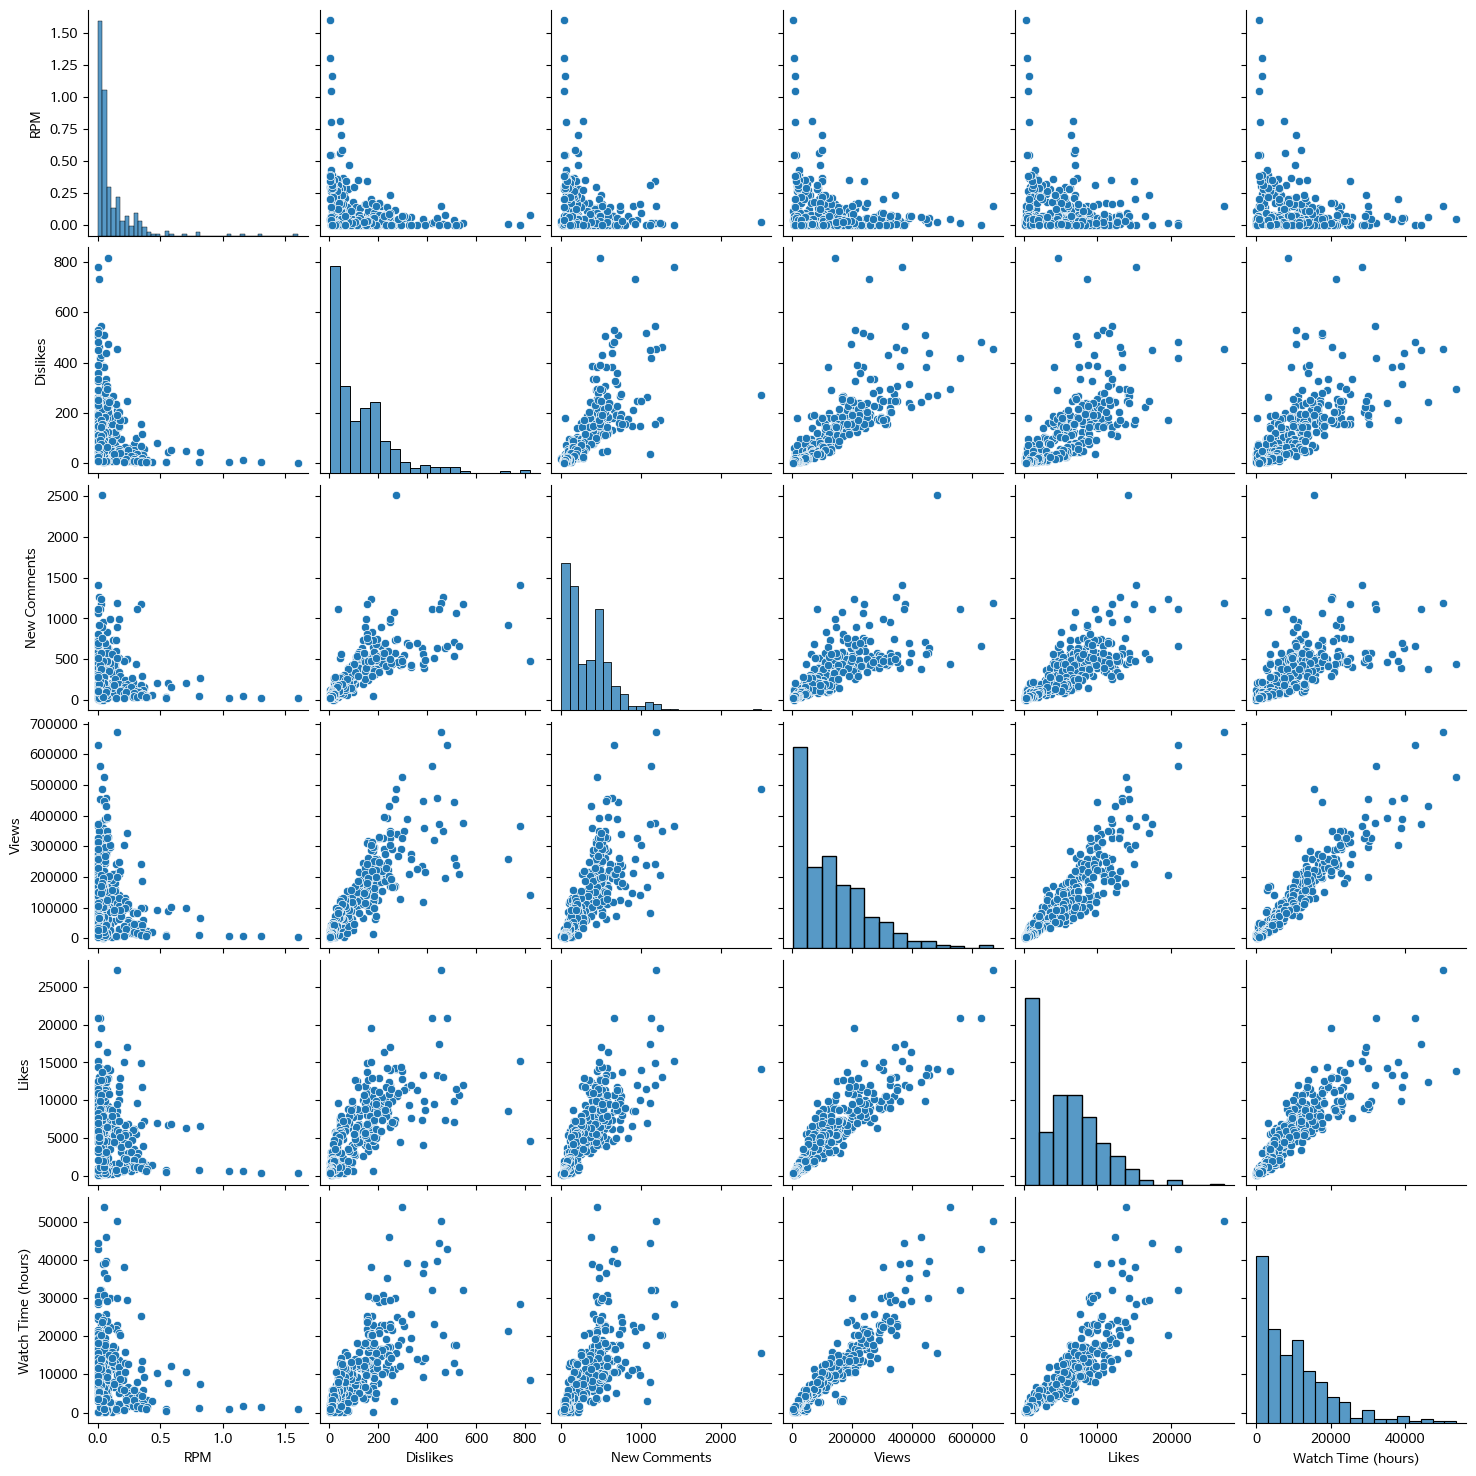

In [22]:
# pairplot으로 음의 상관관계 확인 - RPM
cols3 = ['RPM', 'Dislikes', 'New Comments', 'Views',
       'Likes', 'Watch Time (hours)']
sns.pairplot(youtube_df[cols3])
plt.show()  # 상관관계 획인되지 않음

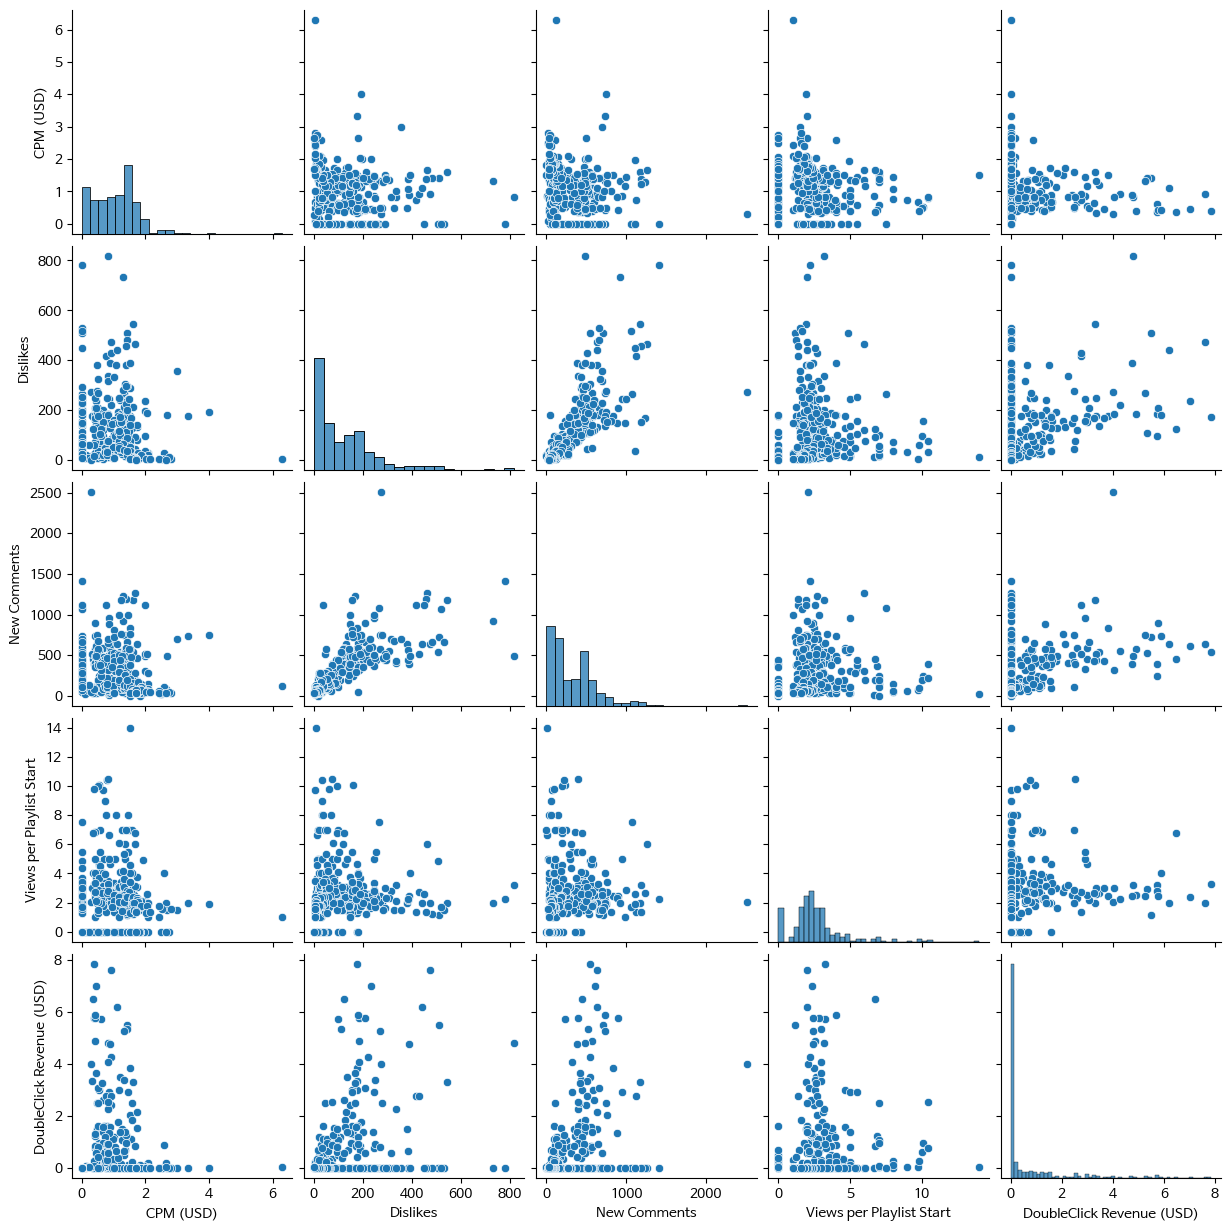

In [23]:
# pairplot으로 음의 상관관계 확인 - CPM
cols4 = ['CPM (USD)', 'Dislikes', 'New Comments', 'Views per Playlist Start',
       'DoubleClick Revenue (USD)']
sns.pairplot(youtube_df[cols4])
plt.show() # 상관관계 획인되지 않음

In [24]:
# 양의 상관관계만 그래프 시각화

#1 둘 다 Playback-Based CPM (USD)이 가장 큰 영향을 끼친다.
#** Playback-Based CPM (USD): Cost per thousand monetized playbacks in USD
# 그래프 1-> 1위부터 5위 그래프, 제일 높은거 색깔다르게

#3 공통된 항목이지만, RPM에서는 시청시간이(Average View Duration, Video Duration),
#  CPM에서는 기타 수입 및 좋아요 비율(YouTube Premium (USD), Like Rate (%), Estimated AdSense Revenue (USD), Estimated Revenue (USD))이 더 중요하다.
# 그래프 2 -> Average View Duration, Video Duration, YouTube Premium (USD), Like Rate (%), Estimated AdSense Revenue (USD), Estimated Revenue (USD)
# 순으로 막대 그래프

#CPM은 사실상 Playback-Based CPM (USD)외에 중요한 항목은 없다(수치 낮음)
#RPM은 광고 시청 수입이(YouTube Ads Revenue (USD), Watch Page Ads Revenue (USD)) 중요한 반면,
#CPM은 유튜브 프리미엄수입이(YouTube Premium (USD)) 더 중요하다.(유튜브 프리미엄 구독자가 많을수록 비용 증가)
#YouTube Premium (USD): Revenue from YouTube Premium subscribers in USD

In [25]:
# 그래프 1
graph1_df = youtube_df_corr_mat.loc['RPM'].drop('RPM').sort_values(ascending=False).head(5).to_frame(name='RPM')
graph2_df = youtube_df_corr_mat.loc['CPM (USD)'].drop('CPM (USD)').sort_values(ascending=False).head(5).to_frame(name='CPM')
graph1_df
graph2_df

,RPM
Playback-Based CPM (USD),0.610663
Year,0.549695
Average View Duration,0.496288
Video Duration,0.436649
ID,0.425593


,CPM
Playback-Based CPM (USD),0.870086
RPM,0.415668
Year,0.309089
ID,0.256408
YouTube Premium (USD),0.218722


In [26]:
graph1_df.index.tolist()

['Playback-Based CPM (USD)',
 'Year',
 'Average View Duration',
 'Video Duration',
 'ID']

In [27]:
graph1_df['RPM'].tolist()

[0.6106633780383327,
 0.5496951477015448,
 0.4962880305473665,
 0.4366493101666562,
 0.425593253269968]

In [28]:
graph1_df['RPM'].tolist()
graph1_df.index.tolist()

[0.6106633780383327,
 0.5496951477015448,
 0.4962880305473665,
 0.4366493101666562,
 0.425593253269968]

['Playback-Based CPM (USD)',
 'Year',
 'Average View Duration',
 'Video Duration',
 'ID']

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'RPM과 수익 측정항목의 상관계수 (상위 5 항목)')

(0.0, 1.0)

([<matplotlib.axis.XTick at 0x26584a1eff0>,
 [Text(0, 0, 'Playback-Based CPM (USD)'),
  Text(1, 0, 'Year'),
  Text(2, 0, 'Average View Duration'),
  Text(3, 0, 'Video Duration'),
  Text(4, 0, 'ID')])

Text(0, 0.5, 'RPM')

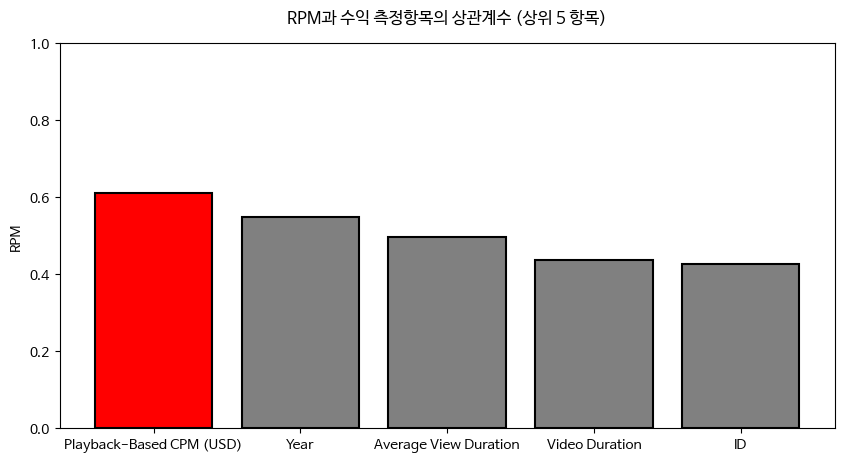

In [29]:
import numpy as np
import matplotlib.font_manager as fm

y = graph1_df['RPM'].tolist()
x = np.arange(len(graph1_df.index))

xlabel = graph1_df.index.tolist()

plt.figure(figsize=(10,5))
plt.bar(x, y, color=['red', 'gray', 'gray', 'gray', 'gray'],
        edgecolor='black', linewidth=1.5)

# 글씨체 설정
plt.title('RPM과 수익 측정항목의 상관계수 (상위 5 항목)', pad=15)
title_font = {'fontsize' : 30, 'fontweight' : 'bold'}
font_path = "C:/WINDOWS/Fonts/HANDotumExt.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', size=10)

# y scale 조정
plt.ylim([0,1])

# y scale 조정
plt.xticks(x, xlabel)
plt.ylabel(str('RPM'))
plt.show()

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'CPM과 수익 측정항목의 상관계수 (상위 5 항목)')

(0.0, 1.0)

([<matplotlib.axis.XTick at 0x26584b98200>,
 [Text(0, 0, 'Playback-Based CPM (USD)'),
  Text(1, 0, 'RPM'),
  Text(2, 0, 'Year'),
  Text(3, 0, 'ID'),
  Text(4, 0, 'YouTube\xa0Premium (USD)')])

Text(0, 0.5, 'CPM')

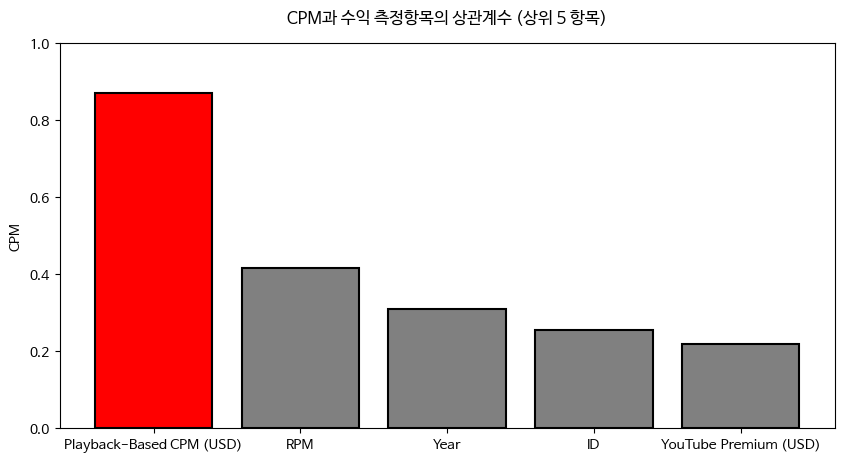

In [30]:
import numpy as np
import matplotlib.font_manager as fm

y = graph2_df['CPM'].tolist()
x = np.arange(len(graph2_df.index))

xlabel = graph2_df.index.tolist()

plt.figure(figsize=(10,5))
plt.bar(x, y, color=['red', 'gray', 'gray', 'gray', 'gray'],
        edgecolor='black', linewidth=1.5)

# 글씨체 설정
plt.title('CPM과 수익 측정항목의 상관계수 (상위 5 항목)', pad=15)
title_font = {'fontsize' : 30, 'fontweight' : 'bold'}
font_path = "C:/WINDOWS/Fonts/MALGUNSL.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', size=10)

# y scale 조정
plt.ylim([0,1])

# y scale 조정
plt.xticks(x, xlabel)
plt.ylabel(str('CPM'))
plt.show()

,RPM
Playback-Based CPM (USD),0.610663
Year,0.549695
Average View Duration,0.496288
Video Duration,0.436649
ID,0.425593
CPM (USD),0.415668
Estimated AdSense Revenue (USD),0.390382
YouTube Ads Revenue (USD),0.377446
Watch Page Ads Revenue (USD),0.377308
Estimated Revenue (USD),0.376919


,CPM
Playback-Based CPM (USD),0.870086
RPM,0.415668
Year,0.309089
ID,0.256408
YouTube Premium (USD),0.218722
Like Rate (%),0.216905
Estimated AdSense Revenue (USD),0.184030
Estimated Revenue (USD),0.171432
Average View Duration,0.168004
YouTube Ads Revenue (USD),0.167330


,RPM,CPM
Average View Duration,0.496288,0.168004
Video Duration,0.436649,0.147707
YouTube Ads Revenue (USD),0.377446,0.167330
Watch Page Ads Revenue (USD),0.377308,0.166971
YouTube Premium (USD),0.258280,0.218722
Like Rate (%),0.261458,0.216905


<Axes: >

(0.0, 1.0)

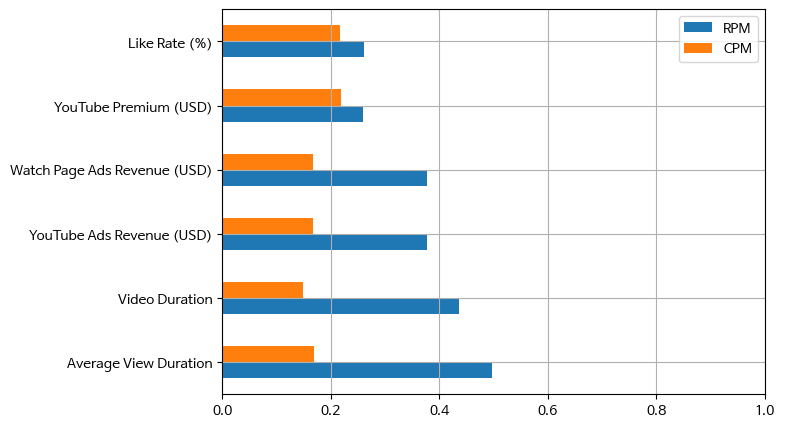

In [31]:
#3 공통된 항목이지만, RPM에서는 시청시간이(Average View Duration, Video Duration),
#  CPM에서는 기타 수입 및 좋아요 비율(YouTube Premium (USD), Like Rate (%), Estimated AdSense Revenue (USD), Estimated Revenue (USD))이 더 중요하다.
# 그래프 2 -> Average View Duration, Video Duration, YouTube Premium (USD), Like Rate (%), Estimated AdSense Revenue (USD), Estimated Revenue (USD)
# 순으로 막대 그래프
graph1_df = youtube_df_corr_mat.loc['RPM'].drop('RPM').sort_values(ascending=False).head(20).to_frame(name='RPM')
graph2_df = youtube_df_corr_mat.loc['CPM (USD)'].drop('CPM (USD)').sort_values(ascending=False).head(20).to_frame(name='CPM')
graph1_df
graph2_df

data = [
    [0.496288,0.168004],
    [0.436649, 0.147707],
    [0.377446, 0.167330],
    [0.377308, 0.166971],
    [0.258280, 0.218722],
    [0.261458, 0.216905]
]
columns = ['RPM', 'CPM']
index = ['Average View Duration', 'Video Duration', 'YouTube Ads Revenue (USD)',
         'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)', 'Like Rate (%)']

graph3_df = pd.DataFrame(data, index, columns)
graph3_df

graph3_df.plot(kind='barh', grid=True, figsize=(7, 5))
plt.xlim([0,1])
plt.show()

### (2) 유튜브 수익에 영향을 주는 환경적 요인 분석

- 국가별 특징, 실업률, 고등 교육 등록률, 채널 타입이 수익과 상관관계가 있는지 확인
- rank 를 기준으로 최상위권(1-100), 상위권(101-300), 중위권(301-600), 하위권(601-955)로 카테고리 분리
- 지표 별(국가별 특징, 실업률, 고등 교육 등록률, 채널 타입) 막대그래프 확인

In [33]:
youtube_df2 = pd.read_csv('./data/Global YouTube Statistics.csv')
youtube_df2[:20]
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfd in position 1582: invalid start byte
# -> csv 파일을 csv utf-8(쉼표로 구분) 형식으로 바꿔서 저장하면 해결됨.

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.28E+11,Music,T-Series,20082,India,IN,Music,...,2000000,2006,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,2012,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.64E+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,2006,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.48E+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000,2006,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0,NaN,Music,0,NaN,NaN,Music,...,NaN,2013,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,羲?Kids Diana Show,112000000,93247040539,People & Blogs,羲?Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,29058044447,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,90479060027,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000,2016,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,77180169894,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000,2018,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [34]:
youtube_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              994 non-null    object 
 4   category                                 950 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  990 non-null    object 
 7   Country                                  873 non-null    object 
 8   Abbreviation                             876 non-null    object 
 9   channel_type                             967 non-null    object 
 10  video_views_rank                         989 non-n

In [35]:
# 'NaN' 값이 있으면 비정상인 데이터이므로 삭제
youtube_df2.dropna(inplace=True)
youtube_df2.head(5)
youtube_df2.info() # 995개 -> 530개

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.28E+11,Music,T-Series,20082,India,IN,Music,...,2000000,2006,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,2012,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.64E+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,2006,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.48E+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000,2006,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,90479060027,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000,2016,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756


<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     530 non-null    int64  
 1   Youtuber                                 530 non-null    object 
 2   subscribers                              530 non-null    int64  
 3   video views                              530 non-null    object 
 4   category                                 530 non-null    object 
 5   Title                                    530 non-null    object 
 6   uploads                                  530 non-null    object 
 7   Country                                  530 non-null    object 
 8   Abbreviation                             530 non-null    object 
 9   channel_type                             530 non-null    object 
 10  video_views_rank                         530 non-null  

In [36]:
# 그래프 설계

# 카테고리 분류 :최상위권[:50], 상위권[50:150], 중위권[150:350], 하위권[350:]

# 0. rank가 높으면 earnings 도 높은지 확인
# 권별 lowest_yearly_earnings, highest_yearly_earnings boxplot

# 1. 나라(환경 요인)
# 분포 확인 : rank 권별 나라 파이 그래프 생성
# 요인 분석 : 나라별 dataframe 생성 -> Population, Urban_population, Gross tertiary education enrollment (%), Unemployment rate

# 2. 시청 지표
# rank 카테고리 - uploads (object 값, 변환 필요) boxplot
# rank 카테고리 - video views mean boxplot
# rank 카테고리 - subscribers
# rank 카테고리 - 운영 기간 (created_year - 2024)

# 3. 분야
# 성공한 유튜브는 어떤 분야가 많은지 확인: channel_type 파이 그래프
# 상위 분야 선정, 비교

# 3. 한국에서 성공한 유튜브 특성 확인
# 한국 유튜브만 dataframe 생성
# uploads, channel_type 확인

In [37]:
# 카테고리 분류 :최상위권, 상위권, 중위권, 하위권
ranks = youtube_df2['rank'].tolist()
# ranks[-1] # 995
bins = [0, 100, 300, 600, 995]
labels = ['최상위권', '상위권', '중위권', '하위권']
rank_group = pd.cut(ranks, bins, labels=labels)
rank_group.value_counts()

최상위권     73
상위권     111
중위권     157
하위권     189
Name: count, dtype: int64

In [38]:
# 0. rank가 높으면 earnings 도 높은지 확인
# 권별 lowest_yearly_earnings, highest_yearly_earnings boxplot
highest_yearly_earnings_mean = youtube_df2.groupby(rank_group)['highest_yearly_earnings'].mean().to_frame()
highest_yearly_earnings_mean

C:\Users\jioyu\AppData\Local\Temp\ipykernel_24628\2539319818.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_yearly_earnings_mean = youtube_df2.groupby(rank_group)['highest_yearly_earnings'].mean().to_frame()


,highest_yearly_earnings
최상위권,2.205995e+07
상위권,1.122440e+07
중위권,9.051067e+06
하위권,6.158484e+06


<BarContainer object of 4 artists>

Text(0.5, 1.0, '순위별 연간 최고 수입 평균')

(0.0, 25000000.0)

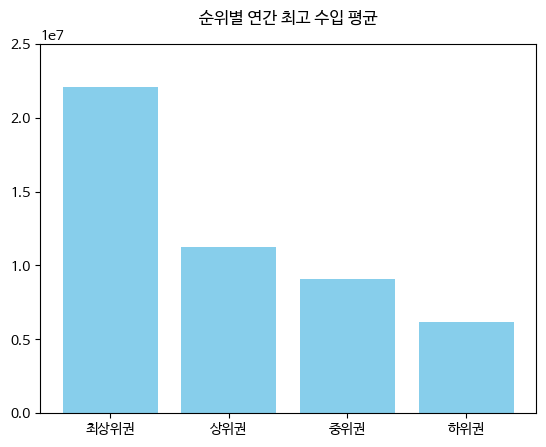

In [39]:
import numpy as np
import matplotlib.font_manager as fm

plt.bar(highest_yearly_earnings_mean.index, highest_yearly_earnings_mean['highest_yearly_earnings'],color='skyblue')

plt.title('순위별 연간 최고 수입 평균', pad=15)
title_font = {'fontsize' : 30, 'fontweight' : 'bold'}
font_path = "C:/WINDOWS/Fonts/MALGUNSL.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', size=10)

plt.ylim([0,2.5e+07])
plt.show()

C:\Users\jioyu\AppData\Local\Temp\ipykernel_24628\569377402.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lowest_yearly_earnings_mean = youtube_df2.groupby(rank_group)['lowest_yearly_earnings'].mean().to_frame()


<BarContainer object of 4 artists>

Text(0.5, 1.0, '순위별 연간 최저 수입 평균')

(0.0, 25000000.0)

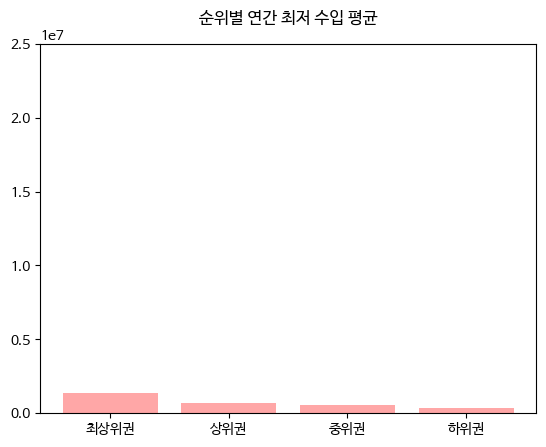

In [40]:
lowest_yearly_earnings_mean = youtube_df2.groupby(rank_group)['lowest_yearly_earnings'].mean().to_frame()
plt.bar(lowest_yearly_earnings_mean.index, lowest_yearly_earnings_mean['lowest_yearly_earnings'],color='#FFA7A7')

plt.title('순위별 연간 최저 수입 평균', pad=15)
title_font = {'fontsize' : 30, 'fontweight' : 'bold'}
font_path = "C:/WINDOWS/Fonts/MALGUNSL.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', size=10)

plt.ylim([0,2.5e+07])
plt.show()

[Text(0, 0.5, 'yearly earnings')]

(0.0, 25000000.0)

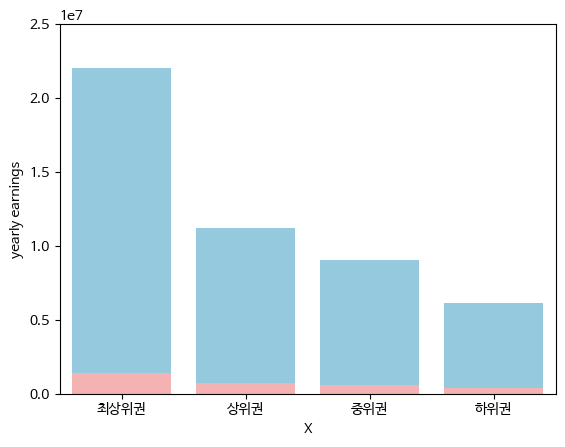

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# creating dataframe
df = pd.DataFrame({
    'X': highest_yearly_earnings_mean.index.tolist(),
    'Y': highest_yearly_earnings_mean['highest_yearly_earnings'].tolist(),
    'Z': lowest_yearly_earnings_mean['lowest_yearly_earnings'].tolist()
})
 
# creating subplots
ax = plt.subplots()
 
# plotting columns
ax = sns.barplot(x=df["X"], y=df["Y"], color='skyblue')
ax = sns.barplot(x=df["X"], y=df["Z"], color='#FFA7A7')
 
# renaming the axes
ax.set(ylabel="yearly earnings")

plt.ylim([0,2.5e+07])
# visualizing illustration
plt.show()

In [42]:
highest_yearly_earnings_mean['lowest_yearly_earnings']= lowest_yearly_earnings_mean['lowest_yearly_earnings']
highest_yearly_earnings_mean
last_graph = highest_yearly_earnings_mean

,highest_yearly_earnings,lowest_yearly_earnings
최상위권,2.205995e+07,1.375654e+06
상위권,1.122440e+07,7.020226e+05
중위권,9.051067e+06,5.659910e+05
하위권,6.158484e+06,3.841244e+05


<Figure size 700x400 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

([0, 1, 2, 3],
 [Text(0, 0, '최상위권'), Text(1, 0, '상위권'), Text(2, 0, '중위권'), Text(3, 0, '하위권')])

Text(0, 0.5, 'yearly earnings')

(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.]),
 [Text(0, 0.0, '0.0'),
  Text(0, 5000000.0, '0.5'),
  Text(0, 10000000.0, '1.0'),
  Text(0, 15000000.0, '1.5'),
  Text(0, 20000000.0, '2.0'),
  Text(0, 25000000.0, '2.5')])

Text(0.5, 1.0, '순위별 연간 수입 평균 (최대/최저)')

(0.0, 25000000.0)

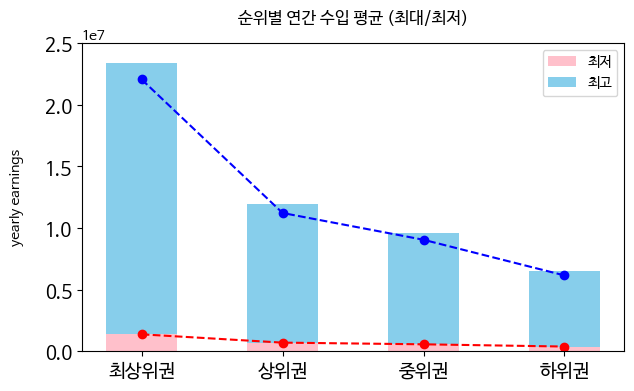

In [43]:

plt.figure(figsize=(7,4))

plt.bar(last_graph.index, last_graph['lowest_yearly_earnings'], label='최저', width=0.5, color='pink') #width default: 0.8
plt.bar(last_graph.index, last_graph['highest_yearly_earnings'], bottom=last_graph['lowest_yearly_earnings'], label='최고', width=0.5, color='skyblue')

plt.xticks(fontsize=13.5)

plt.ylabel('yearly earnings', labelpad=15)
plt.yticks(fontsize=13.5)

plt.title('순위별 연간 수입 평균 (최대/최저)', pad=15)
plt.ylim([0,2.5e+07])
plt.legend()

plt.plot(last_graph.index, last_graph['highest_yearly_earnings'], color='b', linestyle='-', marker='o')
plt.plot(last_graph.index, last_graph['lowest_yearly_earnings'], color='r', linestyle='-', marker='o')

plt.show()

In [44]:
youtube_df3 = youtube_df2.copy()
youtube_df3['rank_group'] = rank_group
youtube_df3

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,rank_group
0,1,T-Series,245000000,2.28E+11,Music,T-Series,20082,India,IN,Music,...,2006,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,최상위권
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,2012,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,최상위권
3,4,Cocomelon - Nursery Rhymes,162000000,1.64E+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,2006,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,최상위권
4,5,SET India,159000000,1.48E+11,Shows,SET India,116536,India,IN,Entertainment,...,2006,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,최상위권
8,9,Like Nastya,106000000,90479060027,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,2016,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756,최상위권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6993406259,Music,Migos ATL,99,United States,US,Entertainment,...,2012,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,하위권
990,991,Natan por A占,12300000,9029609749,Sports,Natan por A占,1200,Brazil,BR,Entertainment,...,2017,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,하위권
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,2018,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,하위권
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,2012,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,하위권


In [45]:
# 1. 나라(환경 요인)
# 분포 확인

country_group = youtube_df3.groupby('Country')
country_group['rank_group'].describe().sort_values(by='count', ascending=False)

# 점유율 제일 높은 미국과 인도만 비교해보기로 함.

,count,unique,top,freq
Country,,,,
United States,175,4,중위권,59
India,137,4,하위권,52
Brazil,27,4,하위권,11
United Kingdom,25,4,하위권,10
Indonesia,19,3,중위권,8
Mexico,16,4,하위권,10
Thailand,13,4,중위권,6
Russia,12,3,하위권,5
Argentina,10,4,중위권,4


In [46]:
# 요인 분석 : United States, india -> Population, Urban_population, Gross tertiary education enrollment (%), Unemployment rate
US_df = youtube_df3[youtube_df3['Country']=='United States']
US_IND_df = US_df.iloc[0,-7:-3].to_frame()
IND_df = youtube_df3[youtube_df3['Country']=='India']
US_IND_df['India'] = IND_df.iloc[0,-7:-3].to_frame()[0]
US_IND_df = US_IND_df.rename(columns={2: 'United States'}).T
US_IND_df

,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
United States,88.2,328239523.0,14.7,270663028.0
India,28.1,1366417754.0,5.36,471031528.0


<Figure size 400x400 with 0 Axes>

Text(0.5, 1.0, 'Gross tertiary education enrollment (%)')

<BarContainer object of 2 artists>

(0.0, 100.0)

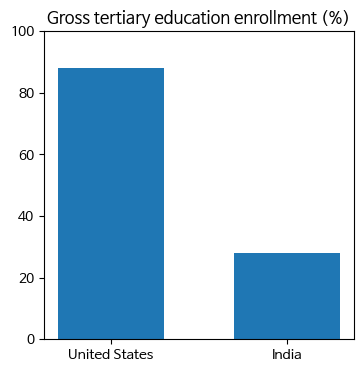

In [47]:
plt.figure(figsize=(4,4))
plt.title('Gross tertiary education enrollment (%)')
plt.bar(US_IND_df.index, US_IND_df['Gross tertiary education enrollment (%)'],width=0.6)
plt.ylim([0,100])
plt.show()

<Figure size 400x400 with 0 Axes>

Text(0.5, 1.0, 'Population')

<BarContainer object of 2 artists>

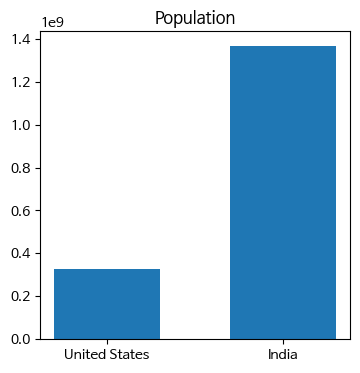

In [48]:
plt.figure(figsize=(4,4))
plt.title('Population')
plt.bar(US_IND_df.index, US_IND_df['Population'],width=0.6)

plt.show()

In [134]:
US_IND_df2= US_df.describe().iloc[1, 5:10].to_frame()
US_IND_df2['India']= IND_df.describe().iloc[1, 5:10].to_frame()['mean']
US_IND_df2 = US_IND_df2.rename(columns={'mean': 'United States'}).T
US_IND_df2

,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
United States,2.482267e+08,52349.486171,8.379655e+05,627034.262514,1.005178e+07
India,2.683782e+08,66404.379562,1.061450e+06,796017.518248,1.274923e+07


<Figure size 400x400 with 0 Axes>

Text(0.5, 1.0, 'video_views_for_the_last_30_days')

<BarContainer object of 2 artists>

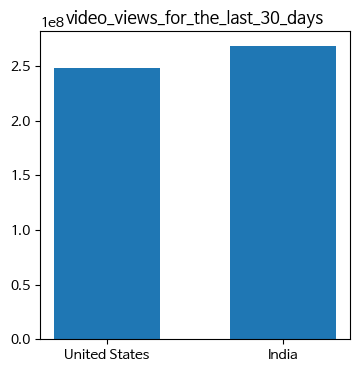

In [50]:
plt.figure(figsize=(4,4))
plt.title('video_views_for_the_last_30_days')
plt.bar(US_IND_df2.index, US_IND_df2['video_views_for_the_last_30_days'],width=0.6)

plt.show()

,highest_yearly_earnings,lowest_yearly_earnings
United States,10051780.0,627034.262514
India,12749230.0,796017.518248


<Axes: >

Text(0.5, 1.0, '연간 수익 평균 (Min-Max)')

(array([0, 1]), [Text(0, 0, 'United States'), Text(1, 0, 'India')])

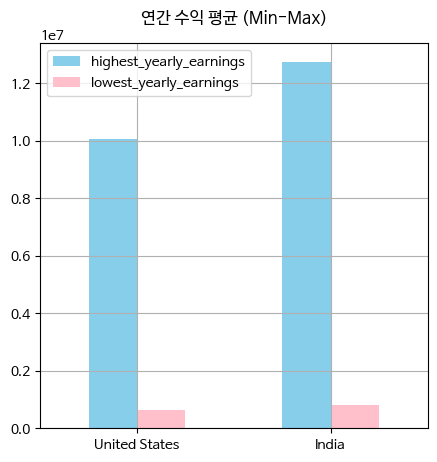

In [136]:
data = [
    [1.005178e+07,627034.262514],
    [1.274923e+07, 796017.518248],
]
columns = ['highest_yearly_earnings', 'lowest_yearly_earnings']
index = ['United States', 'India']

graph3_df = pd.DataFrame(data, index, columns)
graph3_df

graph3_df.plot(kind='bar', grid=True, figsize=(5, 5), color=['skyblue', 'pink'])
plt.title('연간 수익 평균 (Min-Max)', pad=15)
plt.xticks(rotation=360)
plt.show()

In [52]:
# 2. 시청 지표
# rank 카테고리 - uploads (object 값, 변환 필요) boxplot

In [53]:
# rank 카테고리 - video views mean boxplot

In [54]:
# rank 카테고리 - subscribers

In [55]:
# 3. 분야
# 성공한 유튜브는 어떤 분야가 많은지 확인: channel_type 파이 그래프
# 상위 분야 선정, 비교

# 가설 1. category 가 earnings에 영향을 미침
# (자료 조사) Google 검색 결과
# Gaming: Estimated RPM: $2.50, Estimated CPM: $4.55 
# People & Blogs / How To & Style: Estimated RPM: $3.50, Estimated CPM: $6.36 
# Education: Estimated RPM: $5.00, Estimated CPM: $9.09 
# Digital Marketing / Finance (lower bound): Estimated RPM: $8.00, Estimated CPM: $14.55

In [56]:
# 카테고리 분포 확인
youtube_df2['category'].value_counts()
youtube_df2['channel_type'].value_counts()
#- channel_type이 더 직관적이어서 선택

category
Entertainment            140
Music                    107
People & Blogs            68
Gaming                    46
Comedy                    39
Education                 29
Film & Animation          24
News & Politics           21
Howto & Style             13
Shows                     12
Science & Technology      11
Sports                     9
Pets & Animals             3
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Name: count, dtype: int64

channel_type
Entertainment    173
Music            121
Games             43
People            40
Education         32
Comedy            30
News              26
Film              24
Howto             13
Tech              12
Sports             9
Animals            3
Nonprofit          2
Autos              2
Name: count, dtype: int64

In [57]:
category_cnt = youtube_df2['channel_type'].value_counts().to_frame()
category_cnt['count'].tolist()

[173, 121, 43, 40, 32, 30, 26, 24, 13, 12, 9, 3, 2, 2]

([<matplotlib.patches.Wedge at 0x265885c5ac0>,
 [Text(-0.9404500297826567, 0.5705731692621028, 'Entertainment'),
  Text(-0.4012970387863436, -1.0241878180594182, 'Music'),
  Text(0.6199085434944254, -0.9086877338792575, 'Games'),
  Text(0.9756282562616456, -0.5080841520691833, 'People'),
  Text(1.0984350765213975, -0.0586547753165224, 'Education'),
  Text(1.0461621742897658, 0.33991867422268807, 'Comedy'),
  Text(0.878281022189315, 0.6622857737125962, 'News'),
  Text(0.6465637858537411, 0.8899186877588748, 'Film'),
  Text(0.4374610113894409, 1.0092709564404039, 'Howto'),
  Text(0.1817310018021908, 1.0848842532657446, 'ext')],
 [Text(-0.5129727435178127, 0.31122172868841963, '32.6%'),
  Text(-0.21888929388346012, -0.5586479007596826, '22.8%'),
  Text(0.33813193281514103, -0.4956478548432313, '8.1%'),
  Text(0.5321608670518067, -0.2771368102195545, '7.5%'),
  Text(0.5991464053753077, -0.03199351380901221, '6.0%'),
  Text(0.5706339132489631, 0.185410185939648, '5.7%'),
  Text(0.4790623757

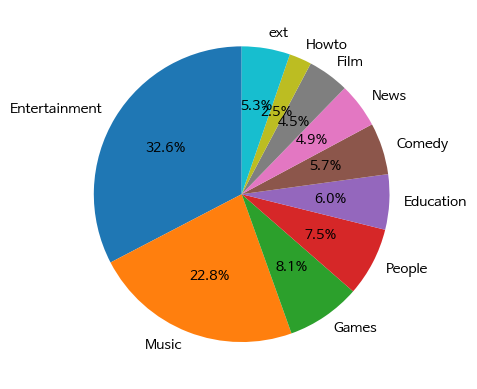

In [156]:
# channel_type 파이 그래프 그리기

labels = ['Entertainment', 'Music', 'Games', 'People', 'Education', 'Comedy',
       'News', 'Film', 'Howto', 'ext']
data = [173, 121, 43, 40, 32, 30, 26, 24, 13, 28]
plt.pie(data, labels= labels,
       autopct='%.1f%%', startangle=90)

plt.show()

In [59]:
#2. rank 권별 분포 확인 Entertainment와 Music의 분포 확인 
ent_df = youtube_df3[youtube_df3['channel_type'] == 'Entertainment']
music_df= youtube_df3[youtube_df3['channel_type'] == 'Music']
ent_df['rank_group'].value_counts(ascending=True)
music_df['rank_group'].value_counts(ascending=True)

rank_group
최상위권    18
상위권     40
하위권     52
중위권     63
Name: count, dtype: int64

rank_group
중위권     27
최상위권    29
상위권     31
하위권     34
Name: count, dtype: int64

Text(0.5, 1.0, 'Entertainment 분야 순위 분포')

([<matplotlib.patches.Wedge at 0x26586f6f4a0>,
 [Text(-0.38529742814034157, 1.1364620063462036, '최상위권'),
  Text(-1.0800642412230743, 0.20847358305364536, '상위권'),
  Text(0.11961561366255476, -1.0934770710756265, '중위권'),
  Text(0.8910913997843544, 0.6449466002936678, '하위권')],
 [Text(-0.22475683308186592, 0.6629361703686187, '10.4%'),
  Text(-0.5891259497580404, 0.11371286348380655, '23.1%'),
  Text(0.06524488017957532, -0.5964420387685234, '36.4%'),
  Text(0.4860498544278296, 0.351789054705637, '30.1%')])

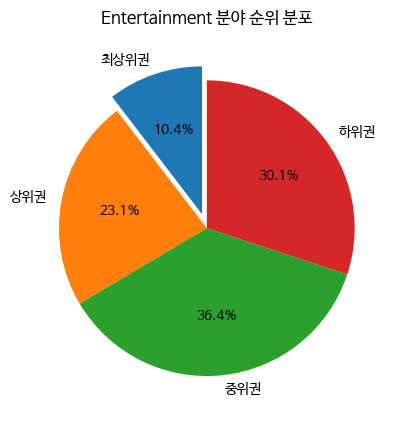

In [60]:
plt.title('Entertainment 분야 순위 분포', pad=15)
labels = ['최상위권', '상위권', '중위권','하위권']
data = [18, 40, 63, 52]
plt.pie(data, labels= labels, autopct='%.1f%%', explode=(0.1,0,0,0),startangle=90)

plt.show()

Text(0.5, 1.0, 'Music 분야 순위 분포')

([<matplotlib.patches.Wedge at 0x26588565d30>,
 [Text(-0.8205476218588568, 0.875614984032237, '최상위권'),
  Text(-0.8123436431357941, -0.7416857862038788, '상위권'),
  Text(0.6874325551457, -0.8587412195334835, '중위권'),
  Text(0.9269945659534634, 0.762024326837897, '하위권')],
 [Text(-0.4786527794176664, 0.5107754073521382, '24.0%'),
  Text(-0.44309653261952403, -0.40455588338393383, '25.6%'),
  Text(0.3749632118976545, -0.46840430156371815, '22.3%'),
  Text(0.5407468301395203, 0.44451419065543984, '28.1%')])

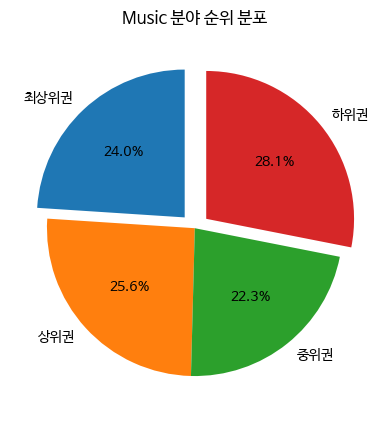

In [154]:
plt.title('Music 분야 순위 분포', pad=15)
labels = ['최상위권', '상위권', '중위권','하위권']
data = [29, 31, 27, 34]
plt.pie(data, labels= labels, autopct='%.1f%%',explode=(0.1,0,0,0), startangle=90)

plt.show()

In [146]:
ent_df2 = ent_df[ent_df['rank_group'] == '최상위권']
music_df2= music_df[music_df['rank_group'] == '최상위권']
ent_df2['highest_yearly_earnings'].mean()
ent_df2['lowest_yearly_earnings'].mean()
music_df2['highest_yearly_earnings'].mean()
music_df2['lowest_yearly_earnings'].mean()

34211111.11111111

2130683.3333333335

19975872.586206898

1246683.4137931035

<Axes: >

Text(0.5, 1.0, '연간 수익 평균 (Min-Max) - Entertainment, Music')

(array([0, 1]), [Text(0, 0, 'Entertainment'), Text(1, 0, 'Music')])

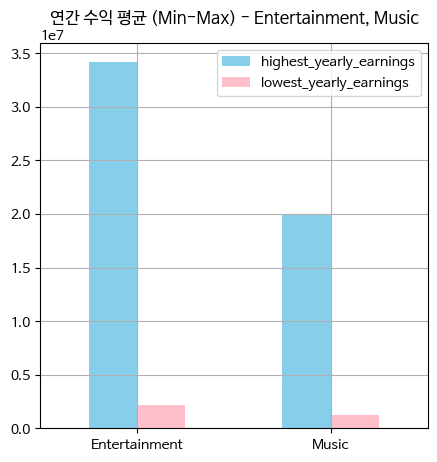

In [148]:
data = [[34211111.11111111, 2130683.3333333335],
[19975872.586206898, 1246683.4137931035]]
index = ['Entertainment', 'Music']
columns =['highest_yearly_earnings', 'lowest_yearly_earnings']

result_df = pd.DataFrame(data, index, columns)

result_df.plot(kind='bar', grid=True, figsize=(5, 5), color=['skyblue', 'pink'])
plt.title('연간 수익 평균 (Min-Max) - Entertainment, Music', pad=15)
plt.xticks(rotation=360)
plt.show()

Text(0.5, 1.0, '한국에서 성공한 유튜브의 카테고리')

<BarContainer object of 4 artists>

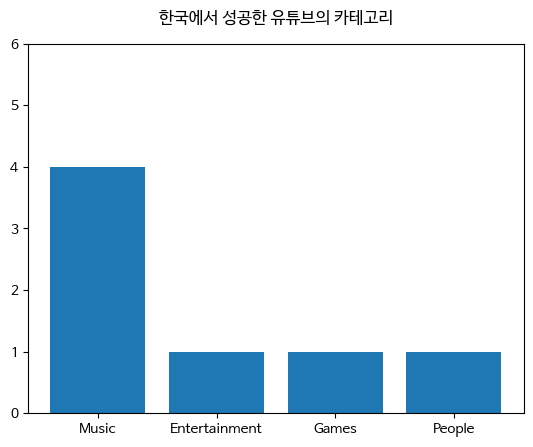

(0.0, 6.0)

In [162]:
# 4. 한국에서 성공한 유튜브 특성 확인
# 한국 유튜브만 dataframe 생성
plt.title('한국에서 성공한 유튜브의 카테고리',pad=15)
korea_df = youtube_df3[youtube_df3['Country'] == 'South Korea']
korea_df2 = korea_df['channel_type'].value_counts().to_frame()
plt.bar(korea_df2.index, korea_df2['count'])
plt.show()
plt.ylim([0,6])
# uploads, channel_type 확인

### (3) 1차 인사이트 도출

** 결과


** 인사이트


### (3) 근거 부족한 부분 확인하고 2차 인사이트 도출

** Crosscheck 할 논문 혹은 다른 데이터 세트 확인